In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('../driver/chromedriver')
driver.get("http://naver.com")
# Chromedriver로 naver 접속

In [3]:
driver.save_screenshot('../images/001.jpg')
# images 폴더에 스크린샷 저장

C:\ProgramData\Anaconda3\lib\site-packages\selenium\webdriver\remote\webdriver.py:1031: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  "type. It should end with a `.png` extension", UserWarning)


True

In [4]:
xpath1 = """//*[@id="account"]/div/a/i"""
driver.find_element_by_xpath(xpath1).click()
# naver 홈페이지에서 login창 클릭

In [5]:
elem_login = driver.find_element_by_id("id")
elem_login.clear()
elem_login.send_keys("pty902")

elem_login = driver.find_element_by_id("pw")
elem_login.clear()
elem_login.send_keys("*************")
# id 입력란 찾고 내용 초기화후 send_keys로 아이디 입력
# pw 입력란 찾고 내용 초기화후 send_keys로 비밀번호 입력

In [6]:
xpath2 = """//*[@id="frmNIDLogin"]/fieldset/input"""
driver.find_element_by_xpath(xpath2).click()
# 아이디 비밀번호 입력후 로그인창 클릭

In [7]:
driver.get("http://mail.naver.com")

In [8]:
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [9]:
raw_list = soup.find_all('div', 'name _ccr(lst.from) ')
raw_list

[]

In [10]:
send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
send_list

[]

In [11]:
driver.close()

In [12]:
driver = webdriver.Chrome('../driver/chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do")

In [13]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")
# 시/군/구 선택창 xpath구하기

In [14]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names
# option의 값에 공백제거하고 가져오기

['남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구']

In [15]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])
# Chromedriver로 시/군/구에 첫번째인 남구 입력

In [16]:
xpath3 = """//*[@id="searRgSelect"]/span"""
element_get_excel = driver.find_element_by_xpath(xpath3).click()
# 조회 버튼 xpath 구하고 클릭하기

In [17]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element2 = driver.find_element_by_id("SIGUNGU_NM0")
    element2.send_keys(gu)
    
    time.sleep(2)
    
    xpath4 = """//*[@id="searRgSelect"]/span"""
    element_sel_gu = driver.find_element_by_xpath(xpath4).click()
    
    time.sleep(1)
    
    xpath5 = """//*[@id="glopopd_excel"]/span"""
    element_get_excel = driver.find_element_by_xpath(xpath5).click()
    
    time.sleep(1)

# 코드에는 문제가 없으나 홈페이지 이상으로 엑셀다운로드 장애발생

In [18]:
driver.close()

In [19]:
import pandas as pd
from glob import glob
# glob 모듈로 많은 파일을 쉽게 읽음

In [20]:
glob('../data/지역*.xls')

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소).xls']

In [22]:
station_files = glob('../data/지역*.xls')
station_files

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소).xls']

In [24]:
tmp_raw = []
for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
station_raw = pd.concat(tmp_raw)    
# 8개 엑셀파일을 하나로 합침

In [26]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 25
Data columns (total 10 columns):
지역       371 non-null object
상호       371 non-null object
주소       371 non-null object
상표       371 non-null object
전화번호     371 non-null object
셀프여부     371 non-null object
고급휘발유    371 non-null object
휘발유      371 non-null object
경유       371 non-null object
실내등유     371 non-null object
dtypes: object(10)
memory usage: 31.9+ KB


In [27]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,대구광역시,그린주유소,대구 달서구 구마로 230 (송현동),알뜰주유소,053-624-5145,Y,-,1259,1159,900
1,대구광역시,국가대표주유소,대구 달서구 당산로 104,SK에너지,053-626-8778,Y,-,1265,1165,950
2,대구광역시,활주로 주유소,대구 달서구 성서로36길 75 (월암동),GS칼텍스,053-581-5100,N,-,1268,1188,870
3,대구광역시,극동주유소,대구 달서구 야외음악당로 83 (성당동),S-OIL,053-625-4001,N,-,1270,1170,900
4,대구광역시,에버그린주유소,대구광역시 달서구 새방로 87 (용산동),S-OIL,053-573-5656,Y,-,1275,1180,950


In [28]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                         '주소':station_raw['주소'],
                         '가격':station_raw['휘발유'],
                         '셀프':station_raw['셀프여부'],
                         '상표':station_raw['상표']})
stations.head()

,Oil_store,가격,상표,셀프,주소
0,그린주유소,1259,알뜰주유소,Y,대구 달서구 구마로 230 (송현동)
1,국가대표주유소,1265,SK에너지,Y,대구 달서구 당산로 104
2,활주로 주유소,1268,GS칼텍스,N,대구 달서구 성서로36길 75 (월암동)
3,극동주유소,1270,S-OIL,N,대구 달서구 야외음악당로 83 (성당동)
4,에버그린주유소,1275,S-OIL,Y,대구광역시 달서구 새방로 87 (용산동)


In [29]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,가격,상표,셀프,주소,구
0,그린주유소,1259,알뜰주유소,Y,대구 달서구 구마로 230 (송현동),달서구
1,국가대표주유소,1265,SK에너지,Y,대구 달서구 당산로 104,달서구
2,활주로 주유소,1268,GS칼텍스,N,대구 달서구 성서로36길 75 (월암동),달서구
3,극동주유소,1270,S-OIL,N,대구 달서구 야외음악당로 83 (성당동),달서구
4,에버그린주유소,1275,S-OIL,Y,대구광역시 달서구 새방로 87 (용산동),달서구


In [30]:
stations['구'].unique()
# unique함수를 사용하여 많은자료를 다 보지않고 확인함

array(['달서구', '달성군', '동구', '북구', '서구', '수성구', '중구', '남구'], dtype=object)

In [31]:
stations[stations['가격']=='-']
# 가격이 기록되지않음(-) 찾기

,Oil_store,가격,상표,셀프,주소,구
58,그린에너지프라자,-,SK에너지,N,대구광역시 달성군 논공읍 비슬로 1705,달성군
59,홍토주유소충전소,-,SK에너지,N,대구광역시 달성군 논공읍 비슬로 1065,달성군
54,대한주유소,-,S-OIL,N,대구 동구 팔공로 329 (봉무동),동구
55,기지주유소,-,GS칼텍스,N,대구 동구 입석동 675,동구
68,대우주유소,-,현대오일뱅크,N,대구광역시 북구 원대로 52 (고성동3가),북구
38,달서주유소,-,S-OIL,N,대구 서구 달서천로 176 (평리동),서구
49,대자연주유소,-,SK에너지,N,대구광역시 수성구 파동로 42 (파동),수성구


In [33]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,가격,상표,셀프,주소,구
0,그린주유소,1259,알뜰주유소,Y,대구 달서구 구마로 230 (송현동),달서구
1,국가대표주유소,1265,SK에너지,Y,대구 달서구 당산로 104,달서구
2,활주로 주유소,1268,GS칼텍스,N,대구 달서구 성서로36길 75 (월암동),달서구
3,극동주유소,1270,S-OIL,N,대구 달서구 야외음악당로 83 (성당동),달서구
4,에버그린주유소,1275,S-OIL,Y,대구광역시 달서구 새방로 87 (용산동),달서구


In [34]:
stations['가격'] = [float(value) for value in stations['가격']]
# 가격의 type을 float(소수)로 변경

In [35]:
stations.reset_index(inplace=True)
del stations['index']
# 8개의 엑셀을 합쳤기 때문에 index 중복될 수 있어 제거

In [36]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 6 columns):
Oil_store    364 non-null object
가격           364 non-null float64
상표           364 non-null object
셀프           364 non-null object
주소           364 non-null object
구            364 non-null object
dtypes: float64(1), object(5)
memory usage: 17.1+ KB


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


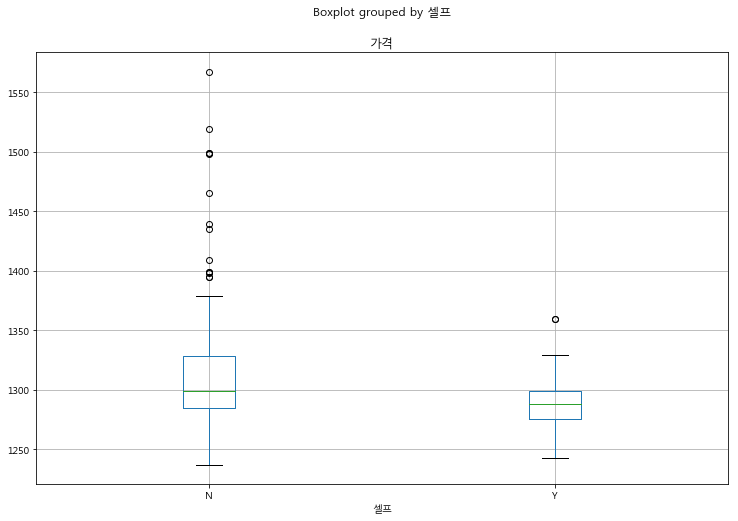

In [38]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

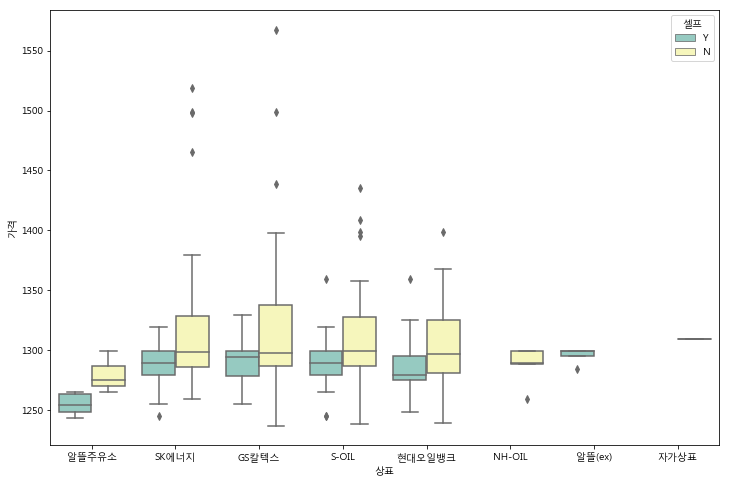

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

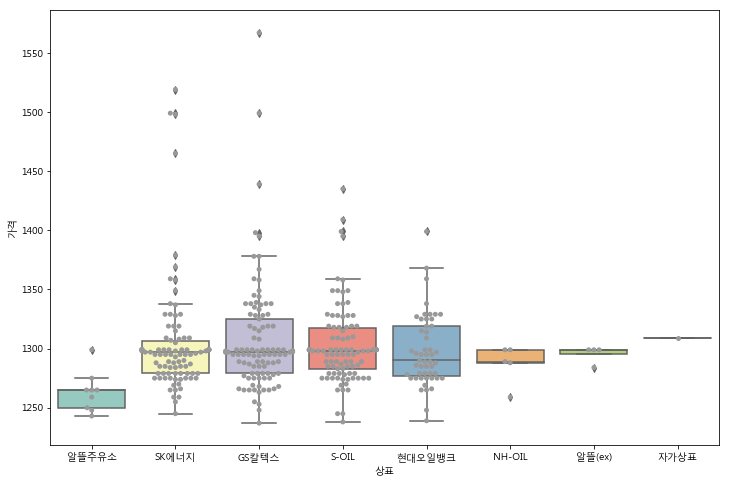

In [40]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()
# swarmplot으로 표현

In [41]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="ignore", category=FutureWarning) = 경고 무시

In [43]:
stations.sort_values(by='가격', ascending=False).head(10)
# 휘발유 가격이 비싼 순서대로 정렬

,Oil_store,가격,상표,셀프,주소,구
278,서대구공단주유소,1567.0,GS칼텍스,N,대구 서구 와룡로 358 (중리동),서구
337,조양주유소,1519.0,SK에너지,N,대구 중구 달구벌대로 2194 (남산동),중구
172,문화주유소,1499.0,GS칼텍스,N,대구 동구 동부로30길 90 (신천동),동구
60,공단제일주유소,1499.0,SK에너지,N,대구 달서구 달서대로 455 (호산동),달서구
363,영남이공대앞주유소,1498.0,SK에너지,N,대구광역시 남구 현충로 187 (대명동),남구
240,KK(주) 침산주유소,1465.0,SK에너지,N,대구 북구 노원로 255 (침산동),북구
59,대림공단주유소,1439.0,GS칼텍스,N,대구 달서구 달서대로 403 (호림동),달서구
58,신도윤주유소,1435.0,S-OIL,N,대구 달서구 월배로 94 (진천동),달서구
171,반야월주유소,1409.0,S-OIL,N,대구 동구 반야월로 199 (동호동),동구
170,율하주유소,1399.0,S-OIL,N,대구광역시 동구 반야월로 104 (율하동),동구


In [44]:
stations.sort_values(by='가격', ascending=True).head(10)
# 휘발유 가격이 싼 순서대로 정렬

,Oil_store,가격,상표,셀프,주소,구
338,삼구주유소,1237.0,GS칼텍스,N,대구 남구 중앙대로 237 (대명동),남구
339,처음처럼주유소,1238.0,S-OIL,N,대구 남구 성당로 156 (대명동),남구
340,미니주유소,1239.0,현대오일뱅크,N,대구 남구 중앙대로48길 6 (대명동),남구
241,영신제2주유소,1243.0,알뜰주유소,Y,"대구 서구 서대구로 207, (평리동)",서구
242,(주)세아에너지,1245.0,S-OIL,Y,대구 서구 서대구로 105 (평리동),서구
280,수성에스주유소,1245.0,SK에너지,Y,대구광역시 수성구 지범로 52 (지산동),수성구
279,한결주유소,1245.0,S-OIL,Y,대구 수성구 지범로 50 (두산동),수성구
243,광명주유소,1248.0,GS칼텍스,N,대구광역시 서구 서대구로 201 (평리동),서구
244,평리주유소,1248.0,현대오일뱅크,Y,대구 서구 서대구로 227 (평리동),서구
245,영신주유소,1248.0,알뜰주유소,Y,대구 서구 서대구로 210 (평리동),서구


In [45]:
import numpy as np
gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], aggfunc=np.mean)
gu_data.head()

,가격
구,
남구,1288.576923
달서구,1317.836066
달성군,1302.965517
동구,1307.148148
북구,1303.558824


In [49]:
geo_path = '../data/05. skorea_municipalities_geo_simple2.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[35.848987 , 128.72818], zoom_start=10.5, tiles='Stamen Toner')
map.choropleth(geo_data = geo_data,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd',
               key_on='feature.id')
map

In [50]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,가격,상표,셀프,주소,구
278,서대구공단주유소,1567.0,GS칼텍스,N,대구 서구 와룡로 358 (중리동),서구
337,조양주유소,1519.0,SK에너지,N,대구 중구 달구벌대로 2194 (남산동),중구
172,문화주유소,1499.0,GS칼텍스,N,대구 동구 동부로30길 90 (신천동),동구
60,공단제일주유소,1499.0,SK에너지,N,대구 달서구 달서대로 455 (호산동),달서구
363,영남이공대앞주유소,1498.0,SK에너지,N,대구광역시 남구 현충로 187 (대명동),남구
240,KK(주) 침산주유소,1465.0,SK에너지,N,대구 북구 노원로 255 (침산동),북구
59,대림공단주유소,1439.0,GS칼텍스,N,대구 달서구 달서대로 403 (호림동),달서구
58,신도윤주유소,1435.0,S-OIL,N,대구 달서구 월배로 94 (진천동),달서구
171,반야월주유소,1409.0,S-OIL,N,대구 동구 반야월로 199 (동호동),동구
170,율하주유소,1399.0,S-OIL,N,대구광역시 동구 반야월로 104 (율하동),동구


In [51]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,가격,상표,셀프,주소,구
338,삼구주유소,1237.0,GS칼텍스,N,대구 남구 중앙대로 237 (대명동),남구
339,처음처럼주유소,1238.0,S-OIL,N,대구 남구 성당로 156 (대명동),남구
340,미니주유소,1239.0,현대오일뱅크,N,대구 남구 중앙대로48길 6 (대명동),남구
241,영신제2주유소,1243.0,알뜰주유소,Y,"대구 서구 서대구로 207, (평리동)",서구
242,(주)세아에너지,1245.0,S-OIL,Y,대구 서구 서대구로 105 (평리동),서구
280,수성에스주유소,1245.0,SK에너지,Y,대구광역시 수성구 지범로 52 (지산동),수성구
279,한결주유소,1245.0,S-OIL,Y,대구 수성구 지범로 50 (두산동),수성구
243,광명주유소,1248.0,GS칼텍스,N,대구광역시 서구 서대구로 201 (평리동),서구
244,평리주유소,1248.0,현대오일뱅크,Y,대구 서구 서대구로 227 (평리동),서구
245,영신주유소,1248.0,알뜰주유소,Y,대구 서구 서대구로 210 (평리동),서구


In [53]:
import googlemaps
gmaps_key = "*****************************"
gmaps = googlemaps.Client(key=gmaps_key)

In [55]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split("(")[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10
# 주소에 (를 기준으로 분리해서 GoogleMaps API로 검색하여 가장 비싼 주유소 lat lng 구함

A Jupyter Widget

,Oil_store,가격,상표,셀프,주소,구,lat,lng
278,서대구공단주유소,1567.0,GS칼텍스,N,대구 서구 와룡로 358 (중리동),서구,35.864375,128.537903
337,조양주유소,1519.0,SK에너지,N,대구 중구 달구벌대로 2194 (남산동),중구,35.862649,128.603229
172,문화주유소,1499.0,GS칼텍스,N,대구 동구 동부로30길 90 (신천동),동구,35.869074,128.628990
60,공단제일주유소,1499.0,SK에너지,N,대구 달서구 달서대로 455 (호산동),달서구,35.840035,128.491519
363,영남이공대앞주유소,1498.0,SK에너지,N,대구광역시 남구 현충로 187 (대명동),남구,35.849369,128.580479
240,KK(주) 침산주유소,1465.0,SK에너지,N,대구 북구 노원로 255 (침산동),북구,35.901280,128.587847
59,대림공단주유소,1439.0,GS칼텍스,N,대구 달서구 달서대로 403 (호림동),달서구,35.835250,128.491297
58,신도윤주유소,1435.0,S-OIL,N,대구 달서구 월배로 94 (진천동),달서구,35.814047,128.524999
171,반야월주유소,1409.0,S-OIL,N,대구 동구 반야월로 199 (동호동),동구,35.872298,128.710251
170,율하주유소,1399.0,S-OIL,N,대구광역시 동구 반야월로 104 (율하동),동구,35.873266,128.699825


In [56]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split("(")[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10
# 주소에 (를 기준으로 분리해서 GoogleMaps API로 검색하여 가장 싼 주유소 lat lng 구함

A Jupyter Widget

,Oil_store,가격,상표,셀프,주소,구,lat,lng
338,삼구주유소,1237.0,GS칼텍스,N,대구 남구 중앙대로 237 (대명동),남구,35.854569,128.590260
339,처음처럼주유소,1238.0,S-OIL,N,대구 남구 성당로 156 (대명동),남구,35.848190,128.569538
340,미니주유소,1239.0,현대오일뱅크,N,대구 남구 중앙대로48길 6 (대명동),남구,35.852345,128.591132
241,영신제2주유소,1243.0,알뜰주유소,Y,"대구 서구 서대구로 207, (평리동)",서구,35.876601,128.554507
242,(주)세아에너지,1245.0,S-OIL,Y,대구 서구 서대구로 105 (평리동),서구,35.867391,128.554988
280,수성에스주유소,1245.0,SK에너지,Y,대구광역시 수성구 지범로 52 (지산동),수성구,35.814503,128.646002
279,한결주유소,1245.0,S-OIL,Y,대구 수성구 지범로 50 (두산동),수성구,35.815304,128.645005
243,광명주유소,1248.0,GS칼텍스,N,대구광역시 서구 서대구로 201 (평리동),서구,35.876103,128.554565
244,평리주유소,1248.0,현대오일뱅크,Y,대구 서구 서대구로 227 (평리동),서구,35.878558,128.554575
245,영신주유소,1248.0,알뜰주유소,Y,대구 서구 서대구로 210 (평리동),서구,35.876662,128.555351


In [62]:
map = folium.Map(location=[35.848987 , 128.72818], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                            radius=15, color='#CD3181', fill_color='#CD3181').add_to(map)
        
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]):
                  folium.CircleMarker([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]],
                            radius=15, color='#3186cc', fill_color='#3186cc').add_to(map)
map                  
# 가장 비싼 10개주유소를 빨간색 가장 싼 10개 주유소를 파란색으로 지도에 표시함            